<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Logistics_Regression_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls '/content/drive/MyDrive/py-master/ML/8_logistic_reg_multiclass/'

8_logistic_regression_multiclass.ipynb	iris_petal_sepal.png


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [7]:
digits = load_digits()

In [8]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

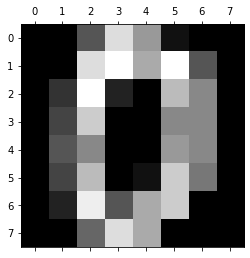

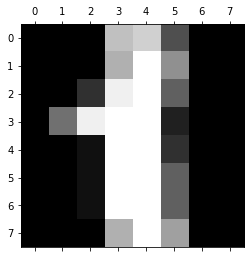

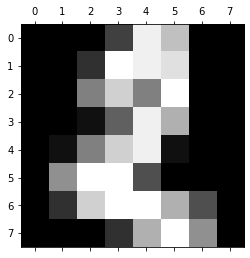

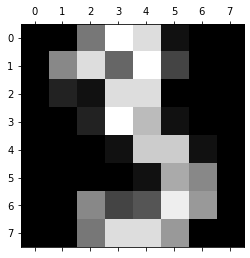

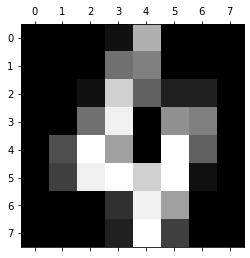

In [12]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [13]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [14]:
from sklearn.model_selection import train_test_split


In [22]:
xtrain, xtest,ytrain,ytest = train_test_split(digits.data,digits.target, test_size=0.2, random_state=110)
len(xtest)

360

In [23]:
len(xtrain)

1437

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model.score(xtest,ytest)

0.9833333333333333

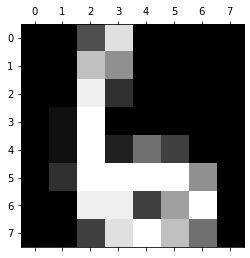

In [28]:
plt.matshow(digits.images[67])

In [29]:
digits.target[67]

6

In [33]:
model.predict([digits.data[67]])

array([6])

In [34]:
model.predict_proba([digits.data[67]])

array([[2.50645542e-07, 2.85685139e-11, 1.07873302e-09, 7.46986696e-13,
        4.27874833e-07, 4.61833514e-10, 9.99996968e-01, 1.56172399e-15,
        2.35188736e-06, 7.44026060e-25]])

In [37]:
ypred=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ytest,ypred)
cm


array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 36]])

Text(69.0, 0.5, 'Truth')

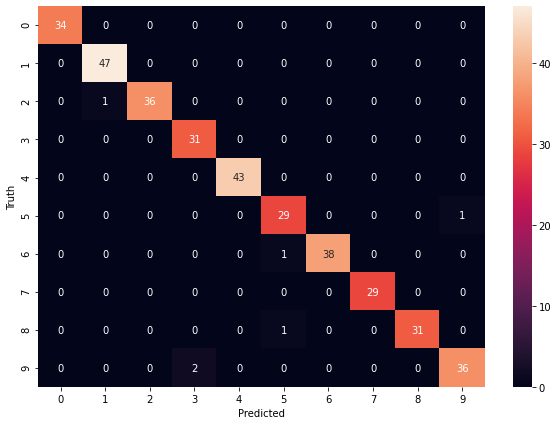

In [40]:
# visualizing the confusion matrix using Seaborn library in python
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')